# Basemaps using `contextily`

`contextily` is a simple library focused on getting static tiled maps of a given area. This can have data and similar things overlaid, as well as getting the map of an area.

We will create a geological map of Nova Scotia, starting with `import contextily`.

In [1]:
import contextily as ctx
import matplotlib.pyplot as plt

Contextily works with tiled maps. These are made up of small images (usually in `.png` format) which are static. These can then be prerendered and have different styles applied, depending on the planned usage of the map.

Contextily provides a number of built-in sources of map tiles, many of which are available for free. Many of them are built on OpenStreetMap's data.

A full listing can be accessed by looking at the `providers` dictionary, which details the maximum zoom, the attribution, and the URL. Some tiles are only available within given bounds, while others are worldwide. This depends on the coverage of the provider.

In [2]:
ctx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://{s}.tile.openstreetmap.de/tiles/osmde/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'attribution': '(C) Openstreetmap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by 

Because it is a nested dictionary, in some cases multiple maps from one provider are grouped, for example Thunderforest:

In [3]:
ctx.providers.Thunderforest

{'OpenCycleMap': {'url': 'https://{s}.tile.thunderforest.com/{variant}/{z}/{x}/{y}.png?apikey={apikey}',
  'attribution': '(C) Thunderforest, (C) OpenStreetMap contributors',
  'variant': 'cycle',
  'apikey': '<insert your api key here>',
  'max_zoom': 22,
  'name': 'Thunderforest.OpenCycleMap'},
 'Transport': {'url': 'https://{s}.tile.thunderforest.com/{variant}/{z}/{x}/{y}.png?apikey={apikey}',
  'attribution': '(C) Thunderforest, (C) OpenStreetMap contributors',
  'variant': 'transport',
  'apikey': '<insert your api key here>',
  'max_zoom': 22,
  'name': 'Thunderforest.Transport'},
 'TransportDark': {'url': 'https://{s}.tile.thunderforest.com/{variant}/{z}/{x}/{y}.png?apikey={apikey}',
  'attribution': '(C) Thunderforest, (C) OpenStreetMap contributors',
  'variant': 'transport-dark',
  'apikey': '<insert your api key here>',
  'max_zoom': 22,
  'name': 'Thunderforest.TransportDark'},
 'SpinalMap': {'url': 'https://{s}.tile.thunderforest.com/{variant}/{z}/{x}/{y}.png?apikey={apike

Note that the URLs are all of the form `example.com/{z}/{x}/{y}.png`. These are standard for tiled webmaps. `{z}` gets replaced by the zoom level, while `{x}` and `{y}` refer to the specific tile required.

Should a map not be freely available, then the `{apikey}` needs to be supplied as well.

It is possible that you know of a tileserver that is not part of this listing, but we can easily add one, using the same sort of format. For our map, we will use two: the [Stamen Toner map](http://maps.stamen.com/toner/#12/37.7706/-122.3782) which is a good monochrome background, and the base geology from [Macrostrat](https://macrostrat.org/). The latter we can supply as a string.

In [4]:
geology_tiles = 'https://tiles.macrostrat.org/carto/{z}/{x}/{y}.png'
basemap = ctx.providers.Stamen.Toner

We then need to choose where we are interested in. The easiest way to do so is to use the `Places` API in contextily. This allows us to give a string of a particular place, which will be converted into a location. These can be varied, but pretty much anything that is available in OpenStreetMap will work.

Examples:
* Entire countries: 'Canada'
* Big cities: 'London' (This will get the first one it finds, usually the most prominent.)
* Specific city and country: 'London, Ontario' (Useful if there is more than one.)
* Road in a city: 'Bathurst Street, Makhanda'
* Specific feature in a city: 'Donkin Reserve, Port Elizabeth'

We can change the the source that the place needs to use when plotted, in this case to our geology tiles. We will create a geological map of Nova Scotia.

In [5]:
location = 'Nova Scotia'
place = ctx.Place(location, source=geology_tiles)

C:\Users\mtb\Miniconda3\envs\cartothings\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Now that we have our location and our basemaps, we can start using them. First, we can do a simple plot of the place. This will use the desired `source`, as defined above.

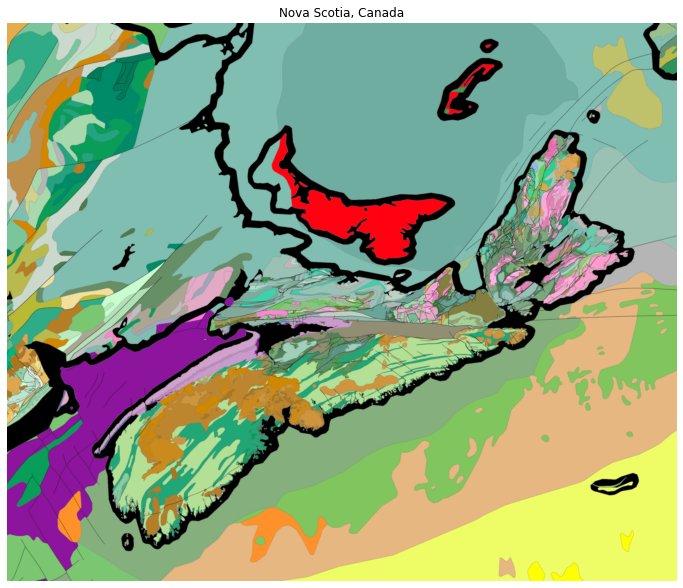

In [6]:
place.plot()

We are also able to edit the `source` arg to use our desired basemap, and we need to add the attribution of where our data comes from, in this case for both of the maps that we are using. The prebuilt maps will have one, that we can access easily, but we will need to write our own for the Macrostrat data.

Text(0.005, 0.005, 'Map tiles by Stamen Design, CC BY 3.0 -- Map data (C) OpenStreetMap contributors | Geological data courtesy of MacroStrat.org (CC-BY)')

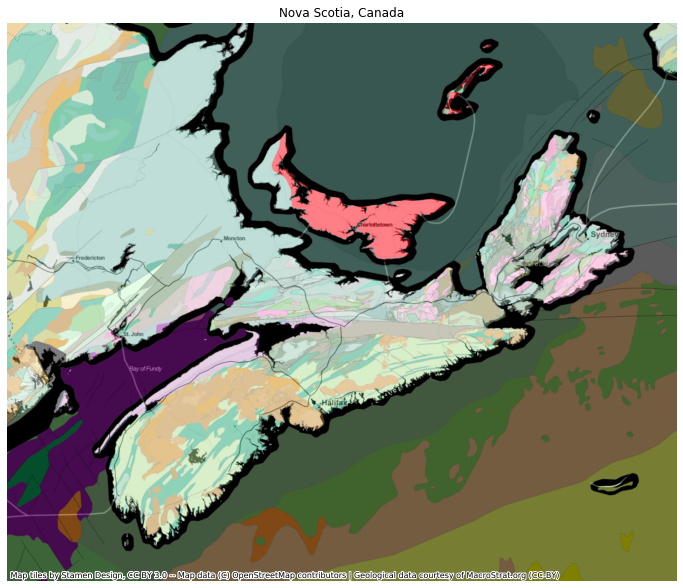

In [7]:
base_ax = place.plot()
ctx.add_basemap(ax=base_ax, source=basemap, alpha=0.5)
ctx.add_attribution(ax=base_ax, text=basemap.attribution + ' | Geological data courtesy of MacroStrat.org (CC-BY)')

Combining everything into one cell, we then get the following block of code:

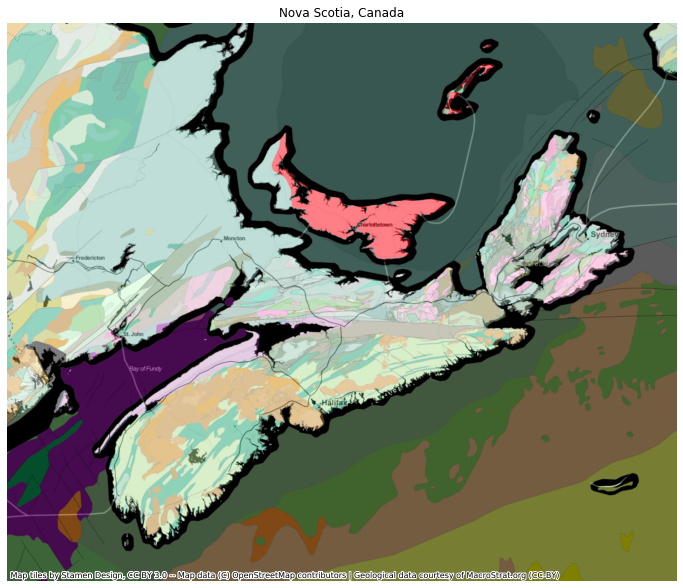

In [8]:
geology_tiles = 'https://tiles.macrostrat.org/carto/{z}/{x}/{y}.png'
basemap = ctx.providers.Stamen.Toner

location = 'Nova Scotia'
place = ctx.Place(location, source=geology_tiles)

base_ax = place.plot()
ctx.add_basemap(ax=base_ax, source=basemap, alpha=0.5)
ctx.add_attribution(ax=base_ax, text=basemap.attribution + ' | Geological data courtesy of MacroStrat.org (CC-BY)')
plt.show()

### Bonus - plotting under data

We might have data, not just a place. This can be easily plotting using geopandas and adding a basemap via contextily. For more on loading and saving geographical data formats such as `.shp`, check out the [_05_Read_and_write_SHP.ipynb_](https://github.com/agile-geoscience/xlines/blob/master/notebooks/05_Read_and_write_SHP.ipynb) notebook.

In [9]:
import geopandas as gpd

In [10]:
wells = gpd.read_file('../data/offshore_wells_2011_Geographic_NAD27.shp')

In [11]:
wells.head()

,Well_No_,D__,Well_Name,Well_Nam_1,Company,Drilling_U,Spud_Date,Well_Termi,RT_Elevati,Water_Dept,Total_Dept,Total_De_1,Well_Type,Well_Symb,geometry
0,1.0,1.0,Sable Island,C-67,Mobil et al,Bawden Rig 18,1967-06-07,1968-01-02,8.2,3.9,4604.0,15106.0,Exploratory,Plugged dry hole,POINT (-59.91705 43.93470)
1,2.0,2.0,Onondaga,E-84,Shell,Sedneth 1,1969-09-01,1969-11-11,25.9,57.9,3988.0,13085.0,Exploratory,Plugged gas well,POINT (-60.22144 43.72115)
2,3.0,3.0,Oneida,O-25,Shell,Sedneth 1,1969-11-16,1970-02-10,25.9,82.3,4120.0,13516.0,Exploratory,Plugged dry hole,POINT (-61.56014 43.24927)
3,4.0,4.0,Naskapi,N-30,Shell,Sedneth 1,1970-02-16,1970-03-19,26.0,95.1,2205.0,7235.0,Exploratory,Plugged dry hole,POINT (-62.56654 43.49633)
4,5.0,5.0,Mohawk,B-93,Shell,Sedco H,1970-05-03,1970-05-23,31.4,117.0,2126.0,6975.0,Exploratory,Plugged dry hole,POINT (-64.73153 42.70292)


We can plot a GeoDataFrame bby using a given column, in this case total depth.

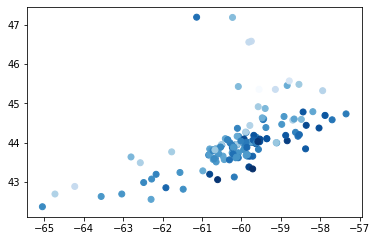

In [12]:
wells.plot(column='Total_Dept', cmap='Blues')

Something to bear in mind is that the tiled maps can only use the Web Mercator (EPSG: 3857), so we will need to reproject our data to use that when we plot:

C:\Users\mtb\Miniconda3\envs\cartothings\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Text(0.5, 1, 'Position of offshore wells near Nova Scotia, Canada')

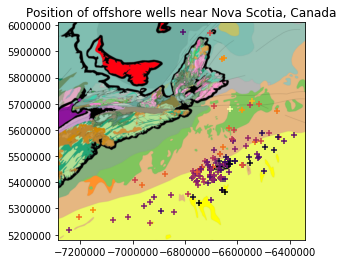

In [13]:
plotted_wells = wells.to_crs(epsg=3857).plot(column='Total_Dept',
                                             cmap='inferno_r', marker='+', edgecolor='k',
                                            )
ctx.add_basemap(ax=plotted_wells, source=geology_tiles)
plt.title('Position of offshore wells near Nova Scotia, Canada')

----

&copy; Agile Scientific 2020, licensed CC-BY